In [1]:
from Snake import Snake
from Agent import DDQNAgent
import numpy as np

Using TensorFlow backend.


In [2]:
grid_size = 7
env = Snake(3, grid_size)
n_actions = env.action_space
n_inputs = env.state_space

model_paths = [] # = ['eval.h5', 'targ.h5']
lr = 0.00025
ddqn_agent = DDQNAgent(n_inputs, n_actions, lr, 128, 20000, epsilon=1., epsilon_dec=0.99,
                       epsilon_min=0.01, TAU=0.1, model_paths=model_paths)

N_GAMES = 700
render_every = 100
MAX_STEPS_WITHOUT_FOOD = 300

fruit_hist = []
reward_hist = []
steps_hist = []

for game in range(N_GAMES):
    state = env.reset()
    done = False    
    render = True if game%render_every==0 else False
    
    score = 0
    steps = 0
    steps_without_food = 0
    
    while not done:
        steps += 1
        action = ddqn_agent.choose_action(state)
        new_state, reward, done, info = env.step(action, render)
        if reward > 0.5:
            steps_without_food = 0
        else:
            steps_without_food += 1      
        score += reward
        ddqn_agent.store_transition(state, action, reward, new_state, done)
        
        state = new_state
        
        if steps_without_food > MAX_STEPS_WITHOUT_FOOD:
            break
    ddqn_agent.learn()
        
    print(f'Ep: {game}, tot. reward: {score:.2f}, fruit ate: {env.fruit_ate}, epsilon: {ddqn_agent.epsilon:.3f}')
    if render:
        env.render('snakes_vid_folder', game)
    fruit_hist.append(env.fruit_ate)
    reward_hist.append(score)
    steps_hist.append(steps)

Creating new model


Ep: 0, tot. reward: -10.20, fruit ate: 0, epsilon: 0.990
Ep: 1, tot. reward: -10.50, fruit ate: 0, epsilon: 0.980
Ep: 2, tot. reward: -10.00, fruit ate: 0, epsilon: 0.970
Ep: 3, tot. reward: -10.00, fruit ate: 0, epsilon: 0.961
Ep: 4, tot. reward: -10.00, fruit ate: 0, epsilon: 0.951
Ep: 5, tot. reward: -9.80, fruit ate: 0, epsilon: 0.941
Ep: 6, tot. reward: -10.00, fruit ate: 0, epsilon: 0.932
Ep: 7, tot. reward: -10.10, fruit ate: 0, epsilon: 0.923
Ep: 8, tot. reward: -10.00, fruit ate: 0, epsilon: 0.914
Ep: 9, tot. reward: -10.10, fruit ate: 0, epsilon: 0.904
Ep: 10, tot. reward: -10.30, fruit ate: 0, epsilon: 0.895
Ep: 11, tot. reward: -10.20, fruit ate: 0, epsilon: 0.886
Ep: 12, tot. reward: -10.20, fruit ate: 0, epsilon: 0.878
Ep: 13, tot. reward: -9.30, fruit ate: 1, epsilon: 0.869
Ep: 14, tot. reward: -9.90, fruit ate: 0, epsilon: 0.860
Ep: 15, tot. reward: -9.90, fruit ate: 0, epsilon: 0.851
Ep: 16, tot. reward: -10.00, fruit ate: 0, epsilon: 0.843
Ep: 17, tot. reward: -10.00,

Ep: 145, tot. reward: -8.80, fruit ate: 1, epsilon: 0.231
Ep: 146, tot. reward: -10.40, fruit ate: 0, epsilon: 0.228
Ep: 147, tot. reward: -10.00, fruit ate: 0, epsilon: 0.226
Ep: 148, tot. reward: -9.80, fruit ate: 0, epsilon: 0.224
Ep: 149, tot. reward: -9.90, fruit ate: 0, epsilon: 0.221
Ep: 150, tot. reward: -10.10, fruit ate: 0, epsilon: 0.219
Ep: 151, tot. reward: -8.30, fruit ate: 1, epsilon: 0.217
Ep: 152, tot. reward: -10.10, fruit ate: 0, epsilon: 0.215
Ep: 153, tot. reward: -10.20, fruit ate: 0, epsilon: 0.213
Ep: 154, tot. reward: -8.20, fruit ate: 1, epsilon: 0.211
Ep: 155, tot. reward: -9.10, fruit ate: 1, epsilon: 0.208
Ep: 156, tot. reward: -10.10, fruit ate: 0, epsilon: 0.206
Ep: 157, tot. reward: -10.00, fruit ate: 0, epsilon: 0.204
Ep: 158, tot. reward: -9.90, fruit ate: 0, epsilon: 0.202
Ep: 159, tot. reward: -10.00, fruit ate: 0, epsilon: 0.200
Ep: 160, tot. reward: -10.00, fruit ate: 0, epsilon: 0.198
Ep: 161, tot. reward: -10.20, fruit ate: 0, epsilon: 0.196
Ep: 

Ep: 285, tot. reward: -8.30, fruit ate: 1, epsilon: 0.056
Ep: 286, tot. reward: -7.00, fruit ate: 2, epsilon: 0.056
Ep: 287, tot. reward: -7.50, fruit ate: 2, epsilon: 0.055
Ep: 288, tot. reward: -10.10, fruit ate: 0, epsilon: 0.055
Ep: 289, tot. reward: -9.20, fruit ate: 1, epsilon: 0.054
Ep: 290, tot. reward: -8.80, fruit ate: 1, epsilon: 0.054
Ep: 291, tot. reward: -10.60, fruit ate: 0, epsilon: 0.053
Ep: 292, tot. reward: -10.60, fruit ate: 0, epsilon: 0.053
Ep: 293, tot. reward: -10.20, fruit ate: 0, epsilon: 0.052
Ep: 294, tot. reward: -10.20, fruit ate: 0, epsilon: 0.052
Ep: 295, tot. reward: -10.30, fruit ate: 0, epsilon: 0.051
Ep: 296, tot. reward: -9.20, fruit ate: 1, epsilon: 0.051
Ep: 297, tot. reward: -10.10, fruit ate: 0, epsilon: 0.050
Ep: 298, tot. reward: -7.70, fruit ate: 2, epsilon: 0.050
Ep: 299, tot. reward: -8.20, fruit ate: 1, epsilon: 0.049
Ep: 300, tot. reward: -10.00, fruit ate: 0, epsilon: 0.049
Ep: 301, tot. reward: -10.10, fruit ate: 0, epsilon: 0.048
Ep: 3

Ep: 426, tot. reward: -10.50, fruit ate: 0, epsilon: 0.014
Ep: 427, tot. reward: -6.30, fruit ate: 3, epsilon: 0.014
Ep: 428, tot. reward: -10.20, fruit ate: 0, epsilon: 0.013
Ep: 429, tot. reward: -10.10, fruit ate: 0, epsilon: 0.013
Ep: 430, tot. reward: -10.20, fruit ate: 0, epsilon: 0.013
Ep: 431, tot. reward: -5.90, fruit ate: 3, epsilon: 0.013
Ep: 432, tot. reward: -5.90, fruit ate: 3, epsilon: 0.013
Ep: 433, tot. reward: 0.70, fruit ate: 8, epsilon: 0.013
Ep: 434, tot. reward: -6.10, fruit ate: 3, epsilon: 0.013
Ep: 435, tot. reward: -0.90, fruit ate: 7, epsilon: 0.013
Ep: 436, tot. reward: 3.00, fruit ate: 10, epsilon: 0.012
Ep: 437, tot. reward: -4.30, fruit ate: 4, epsilon: 0.012
Ep: 438, tot. reward: 2.80, fruit ate: 10, epsilon: 0.012
Ep: 439, tot. reward: -8.30, fruit ate: 1, epsilon: 0.012
Ep: 440, tot. reward: -3.20, fruit ate: 5, epsilon: 0.012
Ep: 441, tot. reward: -6.10, fruit ate: 3, epsilon: 0.012
Ep: 442, tot. reward: -3.20, fruit ate: 5, epsilon: 0.012
Ep: 443, to

Ep: 569, tot. reward: -5.80, fruit ate: 3, epsilon: 0.010
Ep: 570, tot. reward: 1.60, fruit ate: 1, epsilon: 0.010
Ep: 571, tot. reward: -8.40, fruit ate: 1, epsilon: 0.010
Ep: 572, tot. reward: -7.70, fruit ate: 2, epsilon: 0.010
Ep: 573, tot. reward: -8.30, fruit ate: 1, epsilon: 0.010
Ep: 574, tot. reward: -8.50, fruit ate: 1, epsilon: 0.010
Ep: 575, tot. reward: -5.10, fruit ate: 4, epsilon: 0.010
Ep: 576, tot. reward: -2.50, fruit ate: 6, epsilon: 0.010
Ep: 577, tot. reward: -10.00, fruit ate: 0, epsilon: 0.010
Ep: 578, tot. reward: -8.70, fruit ate: 1, epsilon: 0.010
Ep: 579, tot. reward: 1.30, fruit ate: 9, epsilon: 0.010
Ep: 580, tot. reward: -8.90, fruit ate: 1, epsilon: 0.010
Ep: 581, tot. reward: -8.50, fruit ate: 1, epsilon: 0.010
Ep: 582, tot. reward: -6.30, fruit ate: 3, epsilon: 0.010
Ep: 583, tot. reward: -6.60, fruit ate: 3, epsilon: 0.010
Ep: 584, tot. reward: -8.90, fruit ate: 1, epsilon: 0.010
Ep: 585, tot. reward: -7.20, fruit ate: 2, epsilon: 0.010
Ep: 586, tot. r

In [ ]:
ddqn_agent.save_models('eval.h5', 'targ.h5')

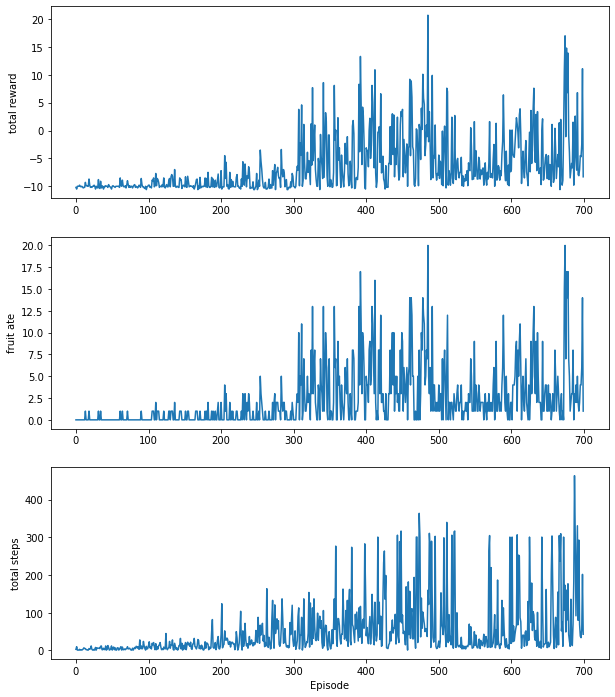

In [4]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,12))

for i, row in enumerate(ax):
    hist = [reward_hist, fruit_hist, steps_hist][i]
    row.plot(range(len(hist)), hist)
    row.set_ylabel(['total reward', 'fruit ate', 'total steps'][i])
    
plt.xlabel("Episode")
plt.show()